# Loading and Verifying Heart Disease Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
#import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import matplotlib.pyplot as plt
#import seaborn as sns


In [ ]:
import pandas as pd

# Provide the full path to the preprocessed_data.csv file
file_path = '/content/drive/My Drive/Heart Disease Prediction Projects/preprocessed_data.csv'

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(data.head())


   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   57    1                2  124          261             0            0   
2   64    1                4  128          263             0            0   
3   74    0                2  120          269             0            2   
4   65    1                4  120          177             0            0   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     141                0            0.3            1   
2     105                1            0.2            2   
3     121                1            0.2            1   
4     140                0            0.4            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7      Presence  
2                        1   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      252 non-null    int64  
 1   Sex                      252 non-null    int64  
 2   Chest pain type          252 non-null    int64  
 3   BP                       252 non-null    int64  
 4   Cholesterol              252 non-null    int64  
 5   FBS over 120             252 non-null    int64  
 6   EKG results              252 non-null    int64  
 7   Max HR                   252 non-null    int64  
 8   Exercise angina          252 non-null    int64  
 9   ST depression            252 non-null    float64
 10  Slope of ST              252 non-null    int64  
 11  Number of vessels fluro  252 non-null    int64  
 12  Thallium                 252 non-null    int64  
 13  Heart Disease            252 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,54.031746,0.698413,3.150794,129.325397,245.468254,0.138889,1.011905,150.087302,0.317460,0.961508,1.555556,0.650794,4.626984
std,9.188106,0.459860,0.953646,15.409589,44.058217,0.346519,0.999929,22.909668,0.466415,1.009510,0.599542,0.921781,1.925853
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,46.750000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,3.000000,130.000000,243.500000,0.000000,2.000000,154.000000,0.000000,0.650000,1.500000,0.000000,3.000000
75%,60.250000,1.000000,4.000000,140.000000,274.250000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,3.800000,3.000000,3.000000,7.000000


# Split the Data

In [ ]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the split
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (176, 13), Test set size: (76, 13)


# Standardize the Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data (optional)
print("First 5 rows of scaled training data:\n", X_train_scaled[:5])


First 5 rows of scaled training data:
 [[ 2.46130338 -1.60991824 -0.15212544  0.71017332 -1.08385017 -0.4163332
  -0.05134983 -1.58880043 -0.67419986  0.12608737  0.76809537 -0.68764594
  -0.86705521]
 [-1.55171805  0.62114956  0.91883763 -0.73632384 -0.57411279 -0.4163332
  -1.05552419 -0.54002828 -0.67419986  0.22341798  0.76809537 -0.68764594
   1.19513015]
 [-0.14173755  0.62114956 -1.22308851  0.31567409 -0.99117064 -0.4163332
  -1.05552419  0.24655084 -0.67419986 -0.16590444 -0.92171445  0.37398288
  -0.86705521]
 [ 0.94286284 -1.60991824  0.91883763 -0.34182461 -0.8058116  -0.4163332
  -1.05552419  0.46504504 -0.67419986 -0.94454927 -0.92171445 -0.68764594
  -0.86705521]
 [-0.79249778 -1.60991824 -1.22308851 -1.59107215 -0.921661   -0.4163332
  -1.05552419  0.8583346  -0.67419986 -0.94454927 -0.92171445 -0.68764594
  -0.86705521]]


# Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

print("Model training completed!")


Model training completed!


# Make Predictions

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Predict probabilities (optional)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class


# Evaluate the Model

**Confusion Matrix**

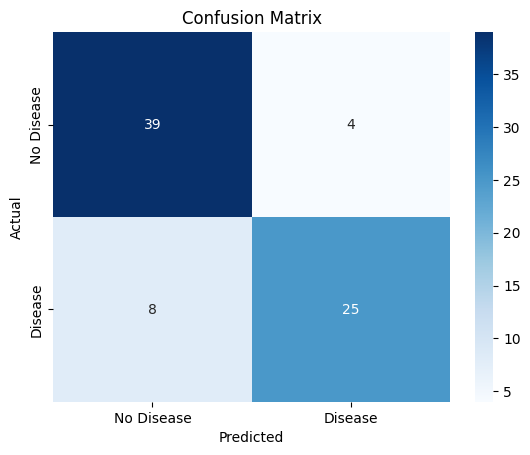

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Strength:
- The model is good at identifying patients without disease (39 out of 43).

Weakness:
- It missed 8 disease cases (false negatives). This can be problematic in a healthcare scenario where failing to diagnose disease could lead to severe consequences.

Improvements:
- Reducing false negatives should be prioritized. Recall for the Presence (disease) class can be improved with techniques like hyperparameter tuning, rebalancing classes, or trying more advanced models (e.g., Random Forest or Gradient Boosting).

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Absence       0.83      0.91      0.87        43
    Presence       0.86      0.76      0.81        33

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



Accuracy:
- Indicates the overall performance of the model. It’s a good result, but accuracy alone doesn’t reflect class imbalances or the cost of false negatives.

Precision:
- Precision is high for both classes, meaning the model minimizes false positives effectively.

Recall:
- The recall for the Disease class (76%) is relatively lower, meaning the model missed 24% of actual disease cases. Recall is critical in healthcare scenarios.

F1-Score:
- Balances precision and recall. The scores are decent, but the Disease class could use improvement (F1: 81%).

The model performs better for the No Disease class compared to the Disease class. This could be due to class imbalance feature importance not being optimized for the disease class.

**Specificity** - Specificity measures how well the model identifies the negative class (No Disease), i.e., how well it avoids false positives.


In [ ]:
# Compute Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")


Specificity: 0.91


*Implication: This is excellent because it shows the model is highly effective at avoiding false positives (incorrectly predicting disease when there isn’t one).*

**AUC (Area Under the Curve)** - ROC AUC evaluates the trade-off between sensitivity (recall) and specificity at various thresholds. A value closer to 1 indicates better model performance.

In [ ]:
from sklearn.metrics import roc_auc_score

# Compute AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")


AUC: 0.92


*Implication: The model is performing significantly better than random guessing (AUC = 0.5). A value closer to 1 is ideal.*


**ROC Curve** - The ROC Curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different thresholds.

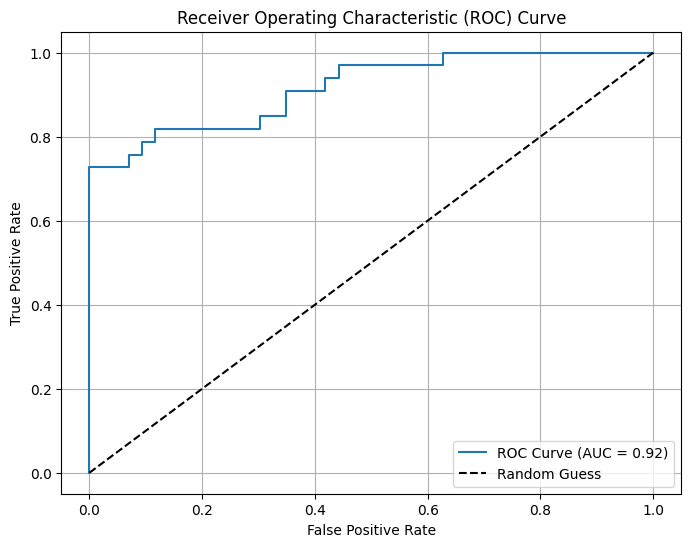

In [ ]:
# Encode the target labels (category to numerical, presence/absence - 1/0)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Converts 'Absence'/'Presence' to 0/1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# HyperParameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers compatible with l1 and l2
}

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)


In [ ]:
# Set Up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Encode the labels in the training and test sets
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert 'Absence'/'Presence' to 0/1
y_test_encoded = label_encoder.transform(y_test)        # Ensure test labels match the same encoding

# Fit the model using encoded labels
grid_search.fit(X_train_scaled, y_train_encoded)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Make predictions
y_pred_tuned = best_model.predict(X_test_scaled)
y_prob_tuned = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class


In [ ]:
# Compute Specificity
tn, fp, fn, tp = cm_tuned.ravel()
specificity_tuned = tn / (tn + fp)
print(f"Specificity (Tuned Model): {specificity_tuned:.2f}")


Specificity (Tuned Model): 0.91


AUC (Tuned Model): 0.92


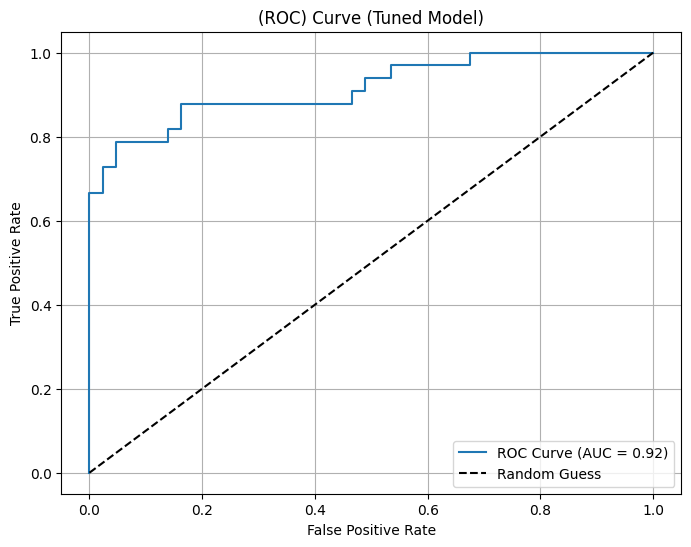

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Converts 'Absence'/'Presence' to 0/1

# Compute AUC
auc_tuned = roc_auc_score(y_test_encoded, y_prob_tuned)
print(f"AUC (Tuned Model): {auc_tuned:.2f}")

# Compute ROC curve
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test_encoded, y_prob_tuned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f"ROC Curve (AUC = {auc_tuned:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve (Tuned Model)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Confusion Matrix and Classification Report:

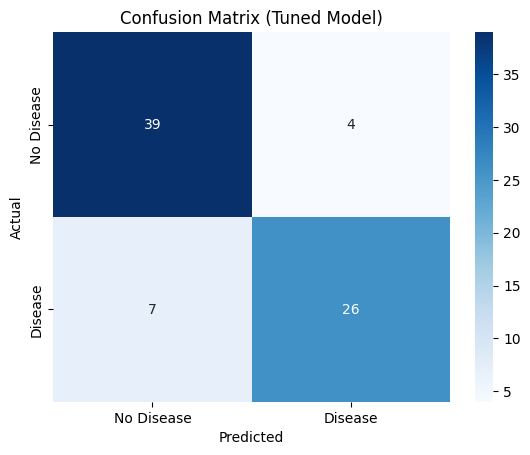

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.87      0.79      0.83        33

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [ ]:
# Ensure y_test is encoded
y_test_encoded = label_encoder.transform(y_test)  # Convert 'Absence'/'Presence' to 0/1


# Confusion Matrix
cm_tuned = confusion_matrix(y_test_encoded, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

# Classification Report
report_tuned = classification_report(y_test_encoded, y_pred_tuned)
print("Classification Report (Tuned Model):\n", report_tuned)



Summary:
The hypertuned model using grid search did just slightly better. Only FN was improved from 8 FN to 7 FN
- perhaps the dataset is simple and well-suited for logistic regression
- perhaps features might not have enough complexity
- dataset size, if small it might appear as a marginal difference

# Adjusting threshold to improve recall

In [ ]:
# Adjust threshold to improve recall
threshold = 0.4
y_pred_adjusted = (y_prob_tuned >= threshold).astype(int)


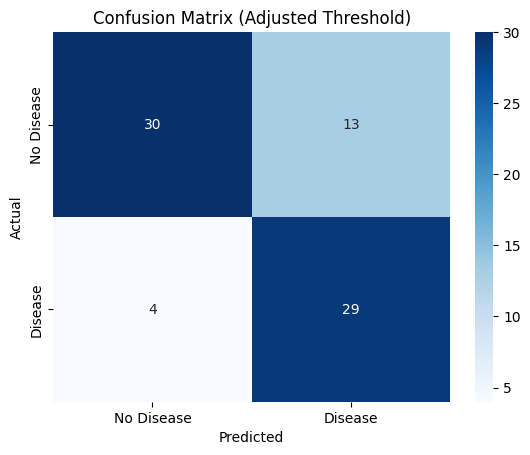

In [ ]:
# Recompute the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the adjusted threshold
cm_adjusted = confusion_matrix(y_test_encoded, y_pred_adjusted)

# Visualize the confusion matrix
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Adjusted Threshold)')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report_adjusted = classification_report(y_test_encoded, y_pred_adjusted)
print("Classification Report (Adjusted Threshold):\n", report_adjusted)


Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        43
           1       0.69      0.88      0.77        33

    accuracy                           0.78        76
   macro avg       0.79      0.79      0.78        76
weighted avg       0.80      0.78      0.78        76



In [ ]:
# Compute Specificity
tn, fp, fn, tp = cm_adjusted.ravel()
specificity_adjusted = tn / (tn + fp)
print(f"Specificity (Adjusted Threshold): {specificity_adjusted:.2f}")


Specificity (Adjusted Threshold): 0.70


# Observation:
- Adjusting the threshold to improve recall for the Disease class (class 1) has introduced trade-offs that ultimately worsened the model's overall performance compared to the hyperparameter-tuned model. lowering the threshold introduced too many false positives, which outweighed the benefit of improving recall.
- ROC Curve and AUC: Represent the model’s ability to rank predictions, which didn’t change significantly with hyperparameter tuning.
- Classification Metrics (Precision, Recall, etc.): Depend on the decision threshold and predicted labels, which were affected by the tuning process.
- Tuned Model: Slightly improved recall and F1-score for Disease, showing better handling of false negatives.
- AUC/ROC Consistency: Indicates that the model's ranking ability didn’t change, suggesting the tuning focused on improving classification boundaries rather than the underlying probability predictions.

# CONCLUSION
**Final Model Selection:**
The hyperparameter-tuned Logistic Regression model was selected as the final model due to its:

Improved recall (from 76% to 79%) without sacrificing precision (87%). High overall accuracy (86%) and an AUC of 0.92, reflecting excellent ranking ability. Practical balance between minimizing false negatives and false positives, which is critical in a healthcare setting.

The Logistic Regression model, fine-tuned with hyperparameter optimization, demonstrated robust performance in predicting heart disease. It provides a practical and interpretable solution for clinical use, balancing accuracy, precision, and recall, and maintaining a high AUC of 0.92. This ensures reliable predictions while minimizing critical errors like missed disease cases.

